# BUSA8001 Programming Task 2  

**Assignment Points**: 100    
**Due Date**: Friday of Week 11 (18 October 2024) at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task

You are employed by a large travel agency to perform customer segmentation analysis. You are provided with a dataset of 2,000 customers collected through their bookings and interactions with the agency. The dataset includes variables such as customer age, gender, annual income, etc.

Your task is to analyse the data in Python using relevant techniques covered in lectures and identify distinct customer segments within the dataset. You will then compile your results into tables and diagrams and writeup a report of up to **1,000 words** (excluding tables and figures). Ensure your report is informative, intuitive, and easily understandable for management, who may not have a technical background.

Your report should address the questions listed below under the following headings:

1. **Word count** (if missing -5 marks)
    - Include the word count of your report 
2. **Introduction** (10 marks)
    - Describe the problem, explain what you aim to achieve by solving it, outline the approach you will take to address it, and specify the data you will use
3. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on key summary statistics, etc.
    - Provide charts (e.g. histograms, pie charts) where appropriate
4. **Customer Segmentation** (40 marks)
    - Standardise the two numeric variables using StandardScaler
    - Choose the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots
    - After identifying the optimal number of clusters, estimate the clusters using both the K-means++ and Agglomerative Clustering techniques. (Use all variables without applying any dimensionality reduction techniques)
    - Provide a separate table for each clustering technique that contains the cluster centers (for all variables), as well as the number of customers in each cluster
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes, i.e. profile the clients in each cluster
        - E.g., Cluster 1 may be a cluster of young, single females employed as managers on high incomes and living in large cities
     - Compare the customer segments identified by the two techniques. Do any clusters overlap?
6. **Recommendations** (20 marks)
    - Suggest marketing strategies and techniques that could be used to target customer segements previously identified using the K-means++ method 
7. **Conclusion** (10 marks)
    - A summary of what you have done in the report 
    
---
---


## Assignment Submission   
You will need to submit two files:   

1. A PDF document containing your report for company management submission. Ensure it's comprehensive, including all relevant tables and graphs generated from the Jupyter notebook that you also submit. I suggest drafting the report in Word and then converting it to PDF for submission.
2. Your Jupyter Notebook containing the Python code used in your analysis. Ensure that your code is well-organized, easy to understand, and capable of generating all the outputs included in the report (will be used to verify your analysis presented in the submitted report).

## Marking Criteria

- To receive full marks your solutions must satisfy the following criteria:
    - Provide numerically correct answers;
    - Use Python methods and libraries covered in lectures;
    - Do not include irrelevant material in the report (that you do not discuss);
    - When including tables and charts label them properly;
    - Each included table and chart you include in the report needs to be discussed in text;
    - The report is to be read by marketing managers who may not have the expertise to understand technical terms; 
        - It should be written in clear and easy to understand sentences.
    - Report must contain the word count
    - See Marking Rubric file for details


## Student ID 47750731
## Name Priyam Sinha

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/Users/priyamsinha/Downloads/data.csv')

# Step 1: Data Preprocessing and Cleaning
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64


In [16]:


# Step 2: Exploratory Data Analysis (EDA)

# Summary statistics
print("Summary Statistics:\n", df.describe())


Summary Statistics:
            Gender  Marital Status          Age    Education         Income  \
count  2000.00000     2000.000000  2000.000000  2000.000000    2000.000000   
mean      0.60450        0.500500    40.823500     1.456500  137516.196500   
std       0.48908        0.500125     9.455848     0.783846   46184.296588   
min       0.00000        0.000000    20.000000     0.000000   35832.000000   
25%       0.00000        0.000000    33.000000     1.000000  101262.750000   
50%       1.00000        1.000000    40.000000     1.000000  133004.000000   
75%       1.00000        1.000000    48.000000     2.000000  171232.500000   
max       1.00000        1.000000    76.000000     3.000000  309364.000000   

        Occupation  Settlement Size  
count  2000.000000      2000.000000  
mean      0.612500         0.834000  
std       0.674219         0.967942  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         0.000000  
75%       

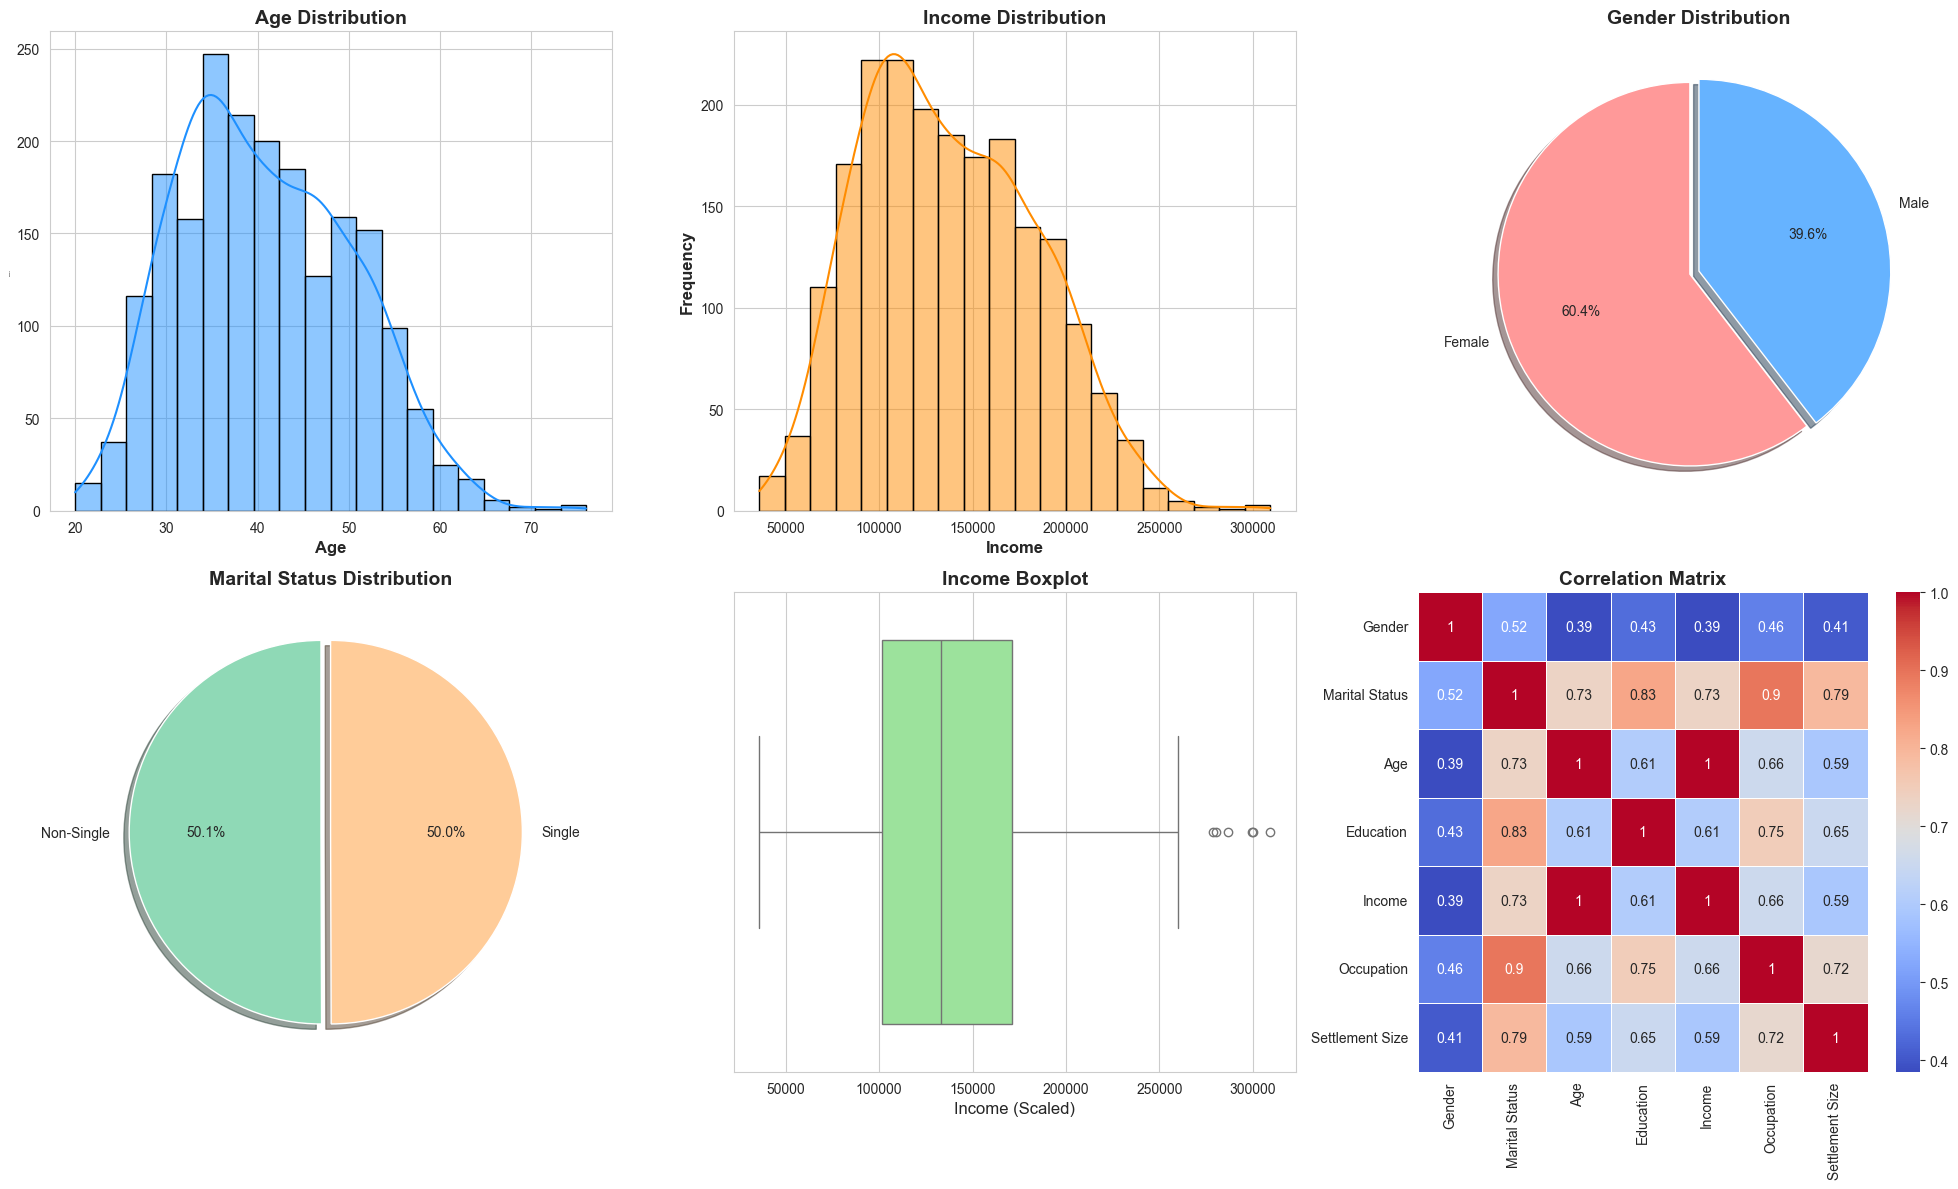

In [17]:

# Set up a color palette
sns.set_palette("Set2")

# Set up the figure size and style
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")

# Age distribution (KDE plot with histogram)
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='dodgerblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=1, fontweight='bold')

# Income distribution (KDE plot with histogram)
plt.subplot(2, 3, 2)
sns.histplot(df['Income'], bins=20, kde=True, color='darkorange', edgecolor='black')
plt.title('Income Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

# Gender distribution (Pie chart)
plt.subplot(2, 3, 3)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, 
        colors=['#ff9999','#66b3ff'], explode=[0.05, 0], shadow=True)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

# Marital status distribution (Pie chart)
plt.subplot(2, 3, 4)
marital_counts = df['Marital Status'].value_counts()
plt.pie(marital_counts, labels=['Non-Single', 'Single'], autopct='%1.1f%%', startangle=90, 
        colors=['#8fd9b6', '#ffcc99'], explode=[0.05, 0], shadow=True)
plt.title('Marital Status Distribution', fontsize=14, fontweight='bold')

# Boxplot for Income (shows spread of income distribution)
plt.subplot(2, 3, 5)
sns.boxplot(x='Income', data=df, color='lightgreen')
plt.title('Income Boxplot', fontsize=14, fontweight='bold')
plt.xlabel('Income (Scaled)', fontsize=12)

# Heatmap for correlation between variables
plt.subplot(2, 3, 6)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

# Show all plots
plt.tight_layout()
plt.show()


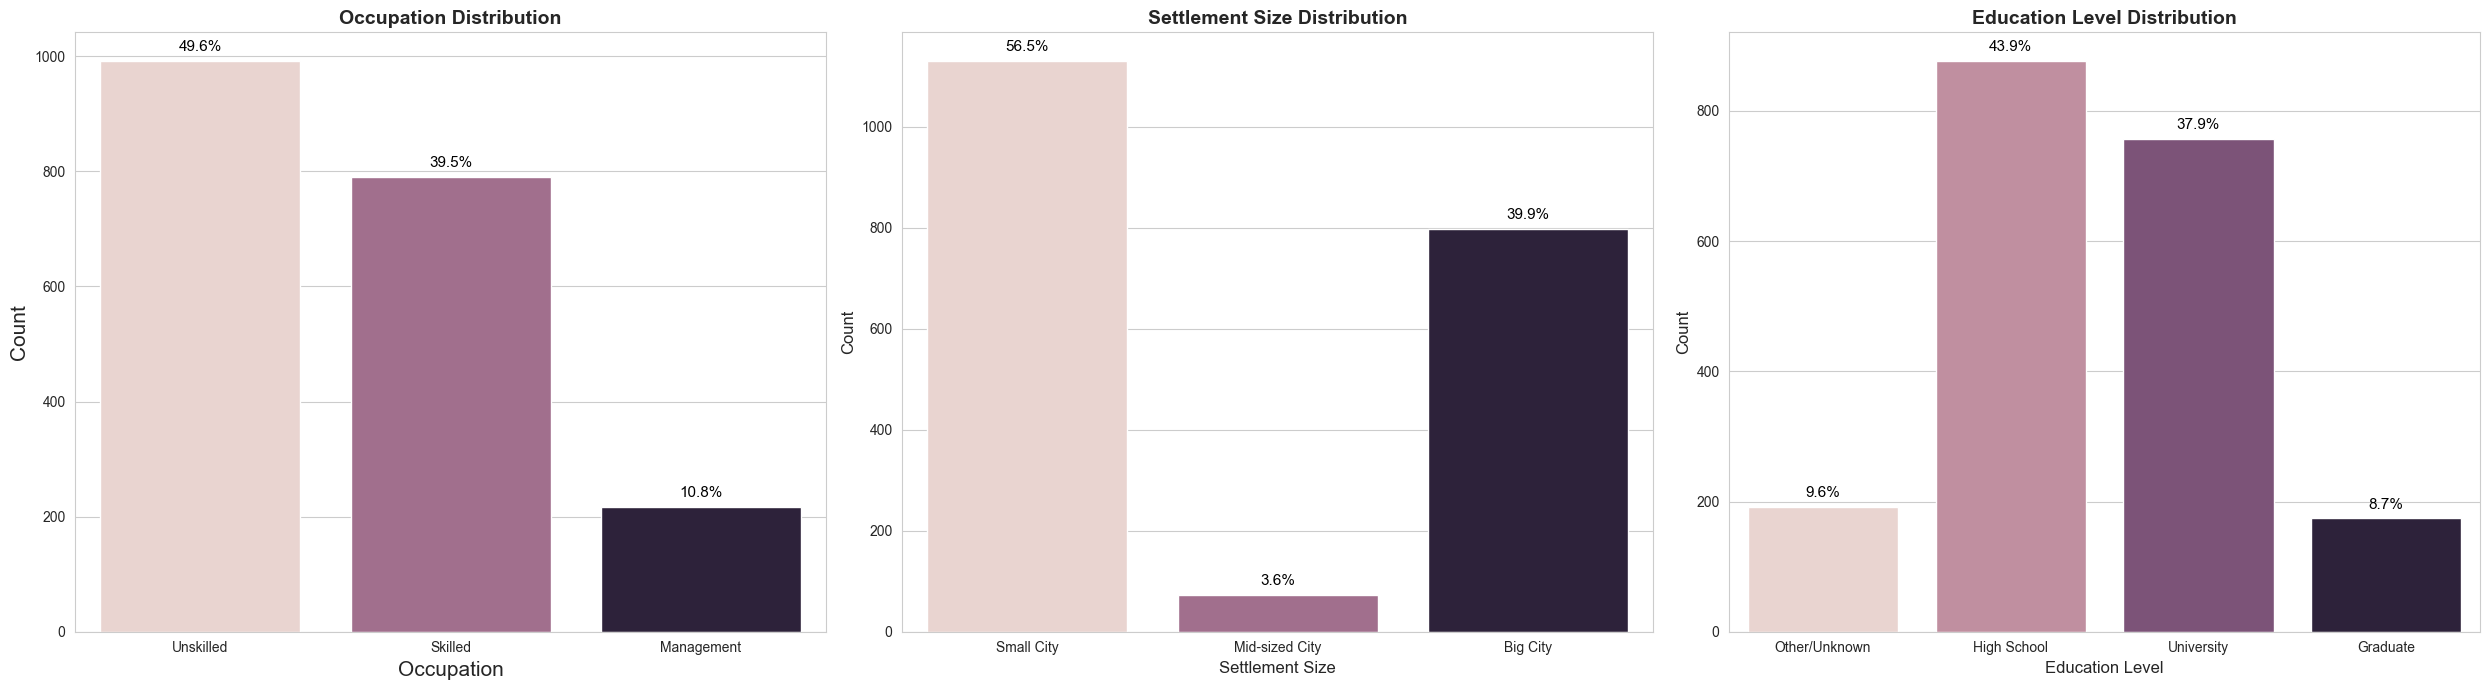

In [18]:
plt.figure(figsize=(25, 7))  # Adjust the figure size for a 3-column layout
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Function to annotate bars with percentages
def annotate_percentage(ax, total_count):
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total_count:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Subplot 1: Occupation Distribution with percentage annotations
plt.subplot(1, 3, 1)
occupation_counts = df['Occupation'].value_counts()
ax1 = sns.barplot(x=occupation_counts.index, y=occupation_counts.values, hue=occupation_counts.index, dodge=False, legend=False)
plt.title('Occupation Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(ticks=[0, 1, 2], labels=['Unskilled', 'Skilled', 'Management'], rotation=0)
annotate_percentage(ax1, total_count=len(df))

# Subplot 2: Settlement Size Distribution with percentage annotations
plt.subplot(1, 3, 2)
settlement_counts = df['Settlement Size'].value_counts()
ax2 = sns.barplot(x=settlement_counts.index, y=settlement_counts.values, hue=settlement_counts.index, dodge=False, legend=False)
plt.title('Settlement Size Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Settlement Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Small City', 'Mid-sized City', 'Big City'], rotation=0)
annotate_percentage(ax2, total_count=len(df))

# Subplot 3: Education Level Distribution with percentage annotations
plt.subplot(1, 3, 3)
education_counts = df['Education'].value_counts()
ax3 = sns.barplot(x=education_counts.index, y=education_counts.values, hue=education_counts.index, dodge=False, legend=False)
plt.title('Education Level Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Other/Unknown', 'High School', 'University', 'Graduate'], rotation=0)
annotate_percentage(ax3, total_count=len(df))

# Tight layout for clean, non-overlapping plots
plt.tight_layout()
plt.show()


In [19]:
# Feature scaling (for Age and Income)
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

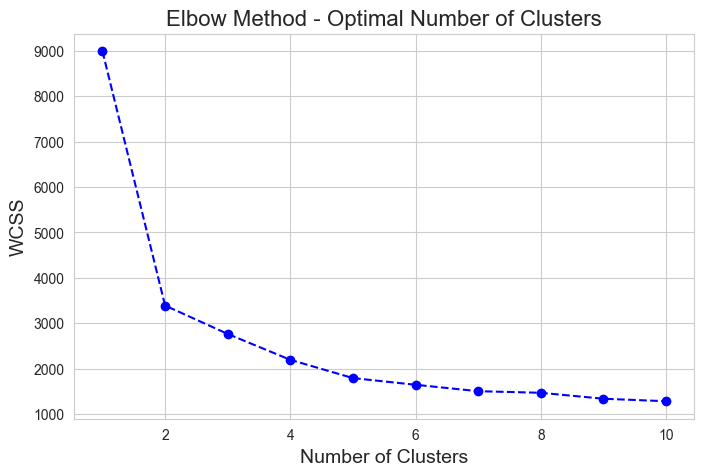

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 31)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method - Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)
plt.show()


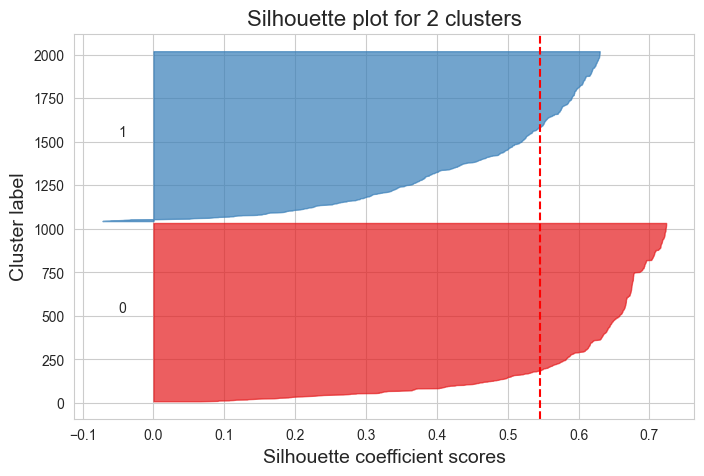

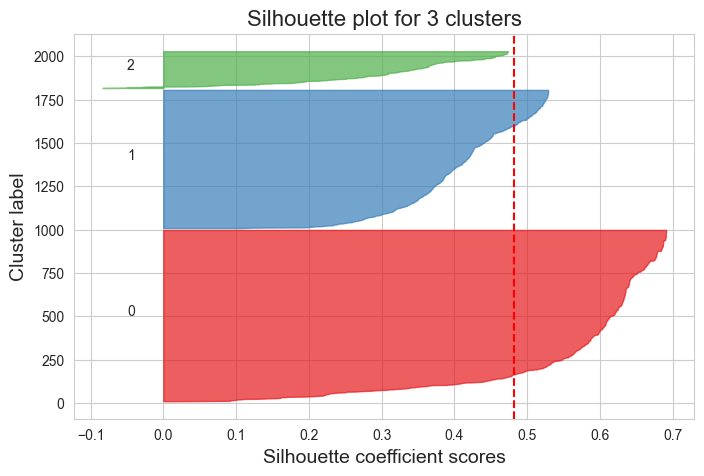

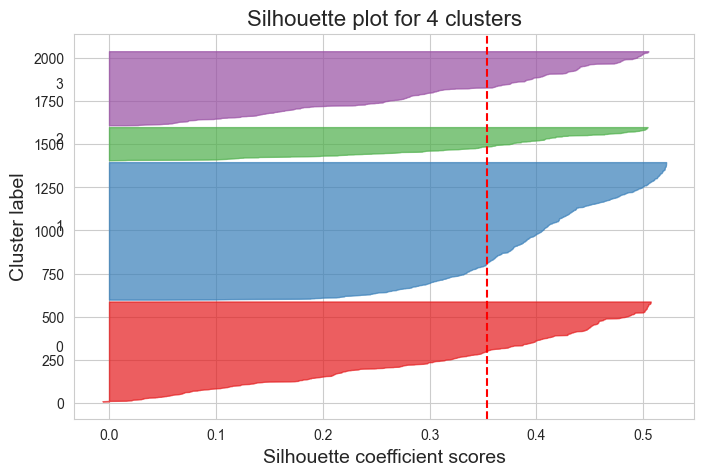

In [21]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import seaborn as sns

# Function to plot silhouette scores
def plot_silhouette(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    
    # Silhouette scores
    silhouette_avg = silhouette_score(df, cluster_labels)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = sns.color_palette("Set1", n_clusters)[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax.set_title(f'Silhouette plot for {n_clusters} clusters', fontsize=16)
    ax.set_xlabel("Silhouette coefficient scores", fontsize=14)
    ax.set_ylabel("Cluster label", fontsize=14)
    plt.axvline(x=silhouette_avg, color="red", linestyle="--",label = 'Average')
    plt.show()

# Plot silhouette scores for 3, 4, and 5 clusters
for n in [2,3, 4]:
    plot_silhouette(n_clusters=n)


In [22]:
df.columns

Index(['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement Size'],
      dtype='object')

In [23]:
from sklearn.cluster import KMeans
import pandas as pd

# Define features (assuming these are the feature columns in your DataFrame)
features = ['Age', 'Income', 'Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

# Apply K-Means++ with the chosen number of clusters (Assume optimal is 3 for this example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

# Fit the KMeans model to the data (assuming df contains only feature columns)
df_kmeans = df[features]
df['KMeans_Cluster'] = kmeans.fit_predict(df_kmeans)  # Fit and assign clusters

# Cluster centers and number of customers in each cluster
cluster_centers_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=features)
cluster_counts_kmeans = df['KMeans_Cluster'].value_counts().sort_index()

# Print results
print("K-Means++ Cluster Centers:")
print(cluster_centers_kmeans)
print("\nNumber of customers per K-Means++ cluster:")
print(cluster_counts_kmeans)


# Cluster centers and number of customers in each cluster
cluster_centers_kmeans = pd.DataFrame(kmeans.cluster_centers_, columns=features)
cluster_counts_kmeans = df['KMeans_Cluster'].value_counts().sort_index()

# Add cluster counts to the cluster centers DataFrame
cluster_centers_kmeans['Number of Customers'] = cluster_counts_kmeans.values

# Print tabular results
print("K-Means++ Cluster Centers with Number of Customers:")
display(cluster_centers_kmeans)  # If using Jupyter or display-rich environments

# If using a standard Python environment
print(cluster_centers_kmeans.to_markdown())  # Prints a markdown table


K-Means++ Cluster Centers:
        Age    Income    Gender  Marital Status  Education  Occupation  \
0 -0.772388 -0.772751  0.354904        0.013145   0.815976    0.020222   
1  0.755957  0.756189  0.854637        0.997494   2.096491    1.220551   
2  0.754172  0.754989  0.826291        0.901408   2.032864    1.084507   

   Settlement Size  
0     7.280081e-02  
1     2.000000e+00  
2     2.220446e-16  

Number of customers per K-Means++ cluster:
KMeans_Cluster
0    989
1    798
2    213
Name: count, dtype: int64
K-Means++ Cluster Centers with Number of Customers:


,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,Number of Customers
0,-0.772388,-0.772751,0.354904,0.013145,0.815976,0.020222,7.280081e-02,989
1,0.755957,0.756189,0.854637,0.997494,2.096491,1.220551,2.000000e+00,798
2,0.754172,0.754989,0.826291,0.901408,2.032864,1.084507,2.220446e-16,213


|    |       Age |    Income |   Gender |   Marital Status |   Education |   Occupation |   Settlement Size |   Number of Customers |
|---:|----------:|----------:|---------:|-----------------:|------------:|-------------:|------------------:|----------------------:|
|  0 | -0.772388 | -0.772751 | 0.354904 |        0.0131446 |    0.815976 |    0.0202224 |       0.0728008   |                   989 |
|  1 |  0.755957 |  0.756189 | 0.854637 |        0.997494  |    2.09649  |    1.22055   |       2           |                   798 |
|  2 |  0.754172 |  0.754989 | 0.826291 |        0.901408  |    2.03286  |    1.08451   |       2.22045e-16 |                   213 |


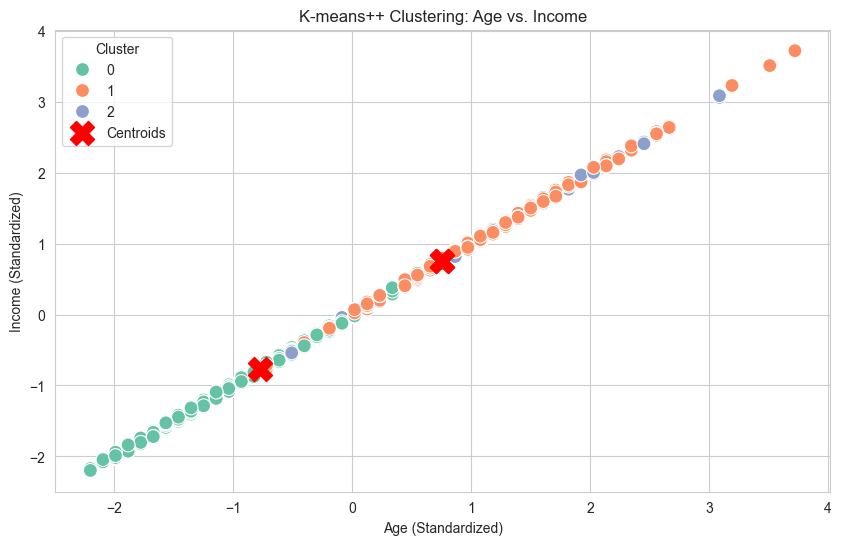

In [24]:


# Step 6: Visualize the K-means Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['KMeans_Cluster'], palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-means++ Clustering: Age vs. Income')
plt.xlabel('Age (Standardized)')
plt.ylabel('Income (Standardized)')
plt.legend(title='Cluster')
plt.show()



In [25]:
df.columns

Index(['Gender', 'Marital Status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement Size', 'KMeans_Cluster'],
      dtype='object')


Number of customers per Agglomerative Clustering cluster:
Agglo_Cluster
0    798
1    992
2    210
Name: count, dtype: int64
K-means++ Cluster Centers:
        Age    Income    Gender  Marital_Status  Education  Occupation  \
0 -0.772388 -0.772751  0.354904        0.013145   0.815976    0.020222   
1  0.755957  0.756189  0.854637        0.997494   2.096491    1.220551   
2  0.754172  0.754989  0.826291        0.901408   2.032864    1.084507   

   Settlement Size  
0     7.280081e-02  
1     2.000000e+00  
2     2.220446e-16  

K-means++ Cluster Sizes:
KMeans_Cluster
0    989
1    798
2    213
Name: count, dtype: int64

Agglomerative Clustering Cluster Sizes:
Agglo_Cluster
0    798
1    992
2    210
Name: count, dtype: int64

Comparison of K-means++ and Agglomerative Clustering Results:
Agglo_Cluster     0    1    2
KMeans_Cluster               
0                 0  971   18
1               798    0    0
2                 0   21  192


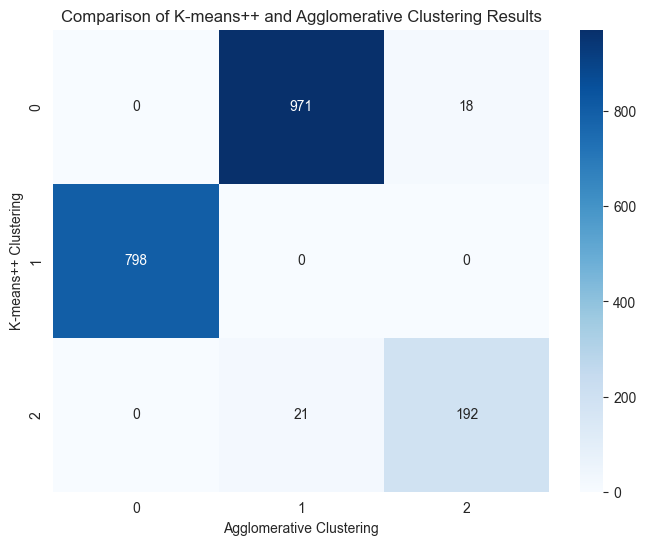

In [26]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 7: Apply Agglomerative Clustering with the same number of clusters (optimal_clusters)
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward', metric='euclidean')

# Fit and predict clusters
df['Agglo_Cluster'] = agg_clustering.fit_predict(df[features])

# Step 8: Visualize the Agglomerative Clustering Results
# (You can add dendrogram plotting here if necessary)

# Print cluster centers for Agglomerative Clustering (Note: Agglomerative Clustering doesn't have cluster centers like K-means)
print("\nNumber of customers per Agglomerative Clustering cluster:")
agglo_cluster_sizes = df['Agglo_Cluster'].value_counts().sort_index()
print(agglo_cluster_sizes)

# Step 9: Provide Cluster Centers for K-means
# Correcting the feature names for K-means cluster centers
features = ['Age', 'Income', 'Gender', 'Marital_Status', 'Education', 'Occupation', 'Settlement Size']



# Creating a DataFrame for K-means++ cluster centers
kmeans_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("K-means++ Cluster Centers:")
print(kmeans_centers)

# Step 10: Provide Cluster Sizes for K-means++ and Agglomerative Clustering
kmeans_cluster_sizes = df['KMeans_Cluster'].value_counts().sort_index()
agglo_cluster_sizes = df['Agglo_Cluster'].value_counts().sort_index()

print("\nK-means++ Cluster Sizes:")
print(kmeans_cluster_sizes)
print("\nAgglomerative Clustering Cluster Sizes:")
print(agglo_cluster_sizes)

# Step 11: Compare the Clustering Results
# Comparing K-means and Agglomerative Clustering cluster memberships
comparison = pd.crosstab(df['KMeans_Cluster'], df['Agglo_Cluster'])
print("\nComparison of K-means++ and Agglomerative Clustering Results:")
print(comparison)

# Visualizing the comparison of K-means++ and Agglomerative Clustering using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues')
plt.title('Comparison of K-means++ and Agglomerative Clustering Results')
plt.xlabel('Agglomerative Clustering')
plt.ylabel('K-means++ Clustering')
plt.show()


In [27]:
import pandas as pd

# Step 9: Provide Cluster Centers for K-means++
# Create a DataFrame to store the cluster centers with proper column names
kmeans_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)

# Display the K-means++ Cluster Centers in a clean format
print("K-means++ Cluster Centers:")
display(kmeans_centers.style.set_caption("K-means++ Cluster Centers")
        .background_gradient(cmap='coolwarm', axis=1)
        .format("{:.2f}"))

# Step 10: Provide Cluster Sizes for K-means++ and Agglomerative Clustering
kmeans_cluster_sizes = df['KMeans_Cluster'].value_counts().sort_index()
agglo_cluster_sizes = df['Agglo_Cluster'].value_counts().sort_index()

# Combine the cluster sizes into one DataFrame for comparison
cluster_sizes_df = pd.DataFrame({
    'K-means++ Cluster Size': kmeans_cluster_sizes,
    'Agglomerative Cluster Size': agglo_cluster_sizes
})

# Display the Cluster Sizes in a clean format
print("\nCluster Sizes for K-means++ and Agglomerative Clustering:")
display(cluster_sizes_df.style.set_caption("Cluster Sizes Comparison")
        .background_gradient(cmap='viridis', subset=['K-means++ Cluster Size', 'Agglomerative Cluster Size'])
        .format("{:.0f}"))


K-means++ Cluster Centers:


,Age,Income,Gender,Marital_Status,Education,Occupation,Settlement Size
0,-0.77,-0.77,0.35,0.01,0.82,0.02,0.07
1,0.76,0.76,0.85,1.00,2.10,1.22,2.00
2,0.75,0.75,0.83,0.90,2.03,1.08,0.00



Cluster Sizes for K-means++ and Agglomerative Clustering:


,K-means++ Cluster Size,Agglomerative Cluster Size
0,989,798
1,798,992
2,213,210


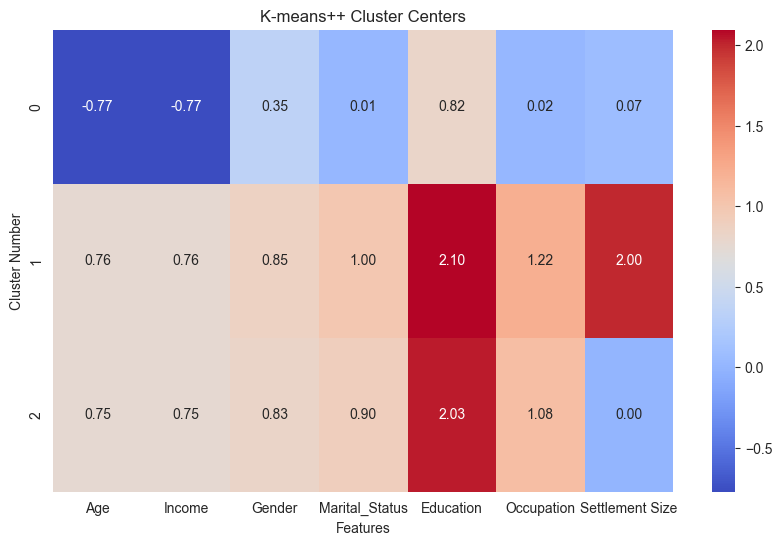

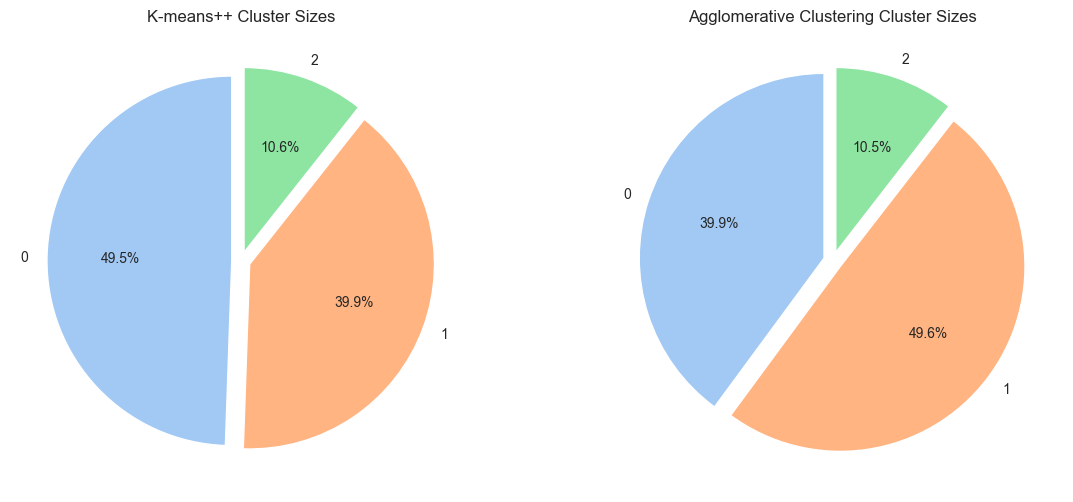

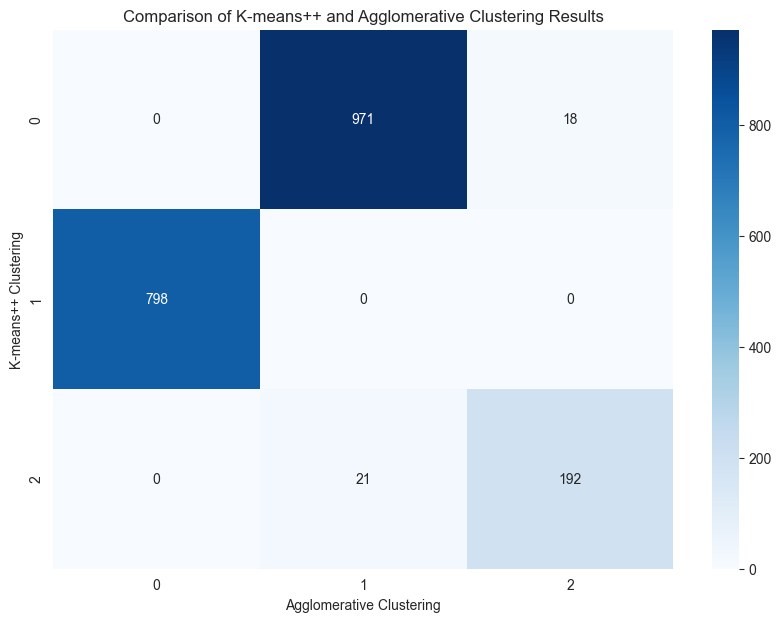

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualizing K-means++ Cluster Centers
# Creating a heatmap to visualize the cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(kmeans_centers, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, xticklabels=features)
plt.title('K-means++ Cluster Centers')
plt.xlabel('Features')
plt.ylabel('Cluster Number')
plt.show()

# Step 2: Visualizing Cluster Sizes
# Creating pie charts for K-means++ and Agglomerative Clustering

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-means++ Cluster Sizes Pie Chart
axes[0].pie(kmeans_cluster_sizes, labels=kmeans_cluster_sizes.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, explode=[0.05]*len(kmeans_cluster_sizes))
axes[0].set_title('K-means++ Cluster Sizes')

# Agglomerative Clustering Cluster Sizes Pie Chart
axes[1].pie(agglo_cluster_sizes, labels=agglo_cluster_sizes.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, explode=[0.05]*len(agglo_cluster_sizes))
axes[1].set_title('Agglomerative Clustering Cluster Sizes')

plt.show()

# Step 3: Comparing K-means++ and Agglomerative Clustering Results
# Visualizing the comparison of K-means++ and Agglomerative Clustering using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(comparison, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Comparison of K-means++ and Agglomerative Clustering Results')
plt.xlabel('Agglomerative Clustering')
plt.ylabel('K-means++ Clustering')
plt.show()
